## Imports

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Checking the first sample

In [2]:
# Long running
y, x = load_data(train=True)
print(f"First sample: {x[0,:]}")
print(f"First sample label: {y[0]}")

First sample: [ 1.38470e+02  5.16550e+01  9.78270e+01  2.79800e+01  9.10000e-01
  1.24711e+02  2.66600e+00  3.06400e+00  4.19280e+01  1.97760e+02
  1.58200e+00  1.39600e+00  2.00000e-01  3.26380e+01  1.01700e+00
  3.81000e-01  5.16260e+01  2.27300e+00 -2.41400e+00  1.68240e+01
 -2.77000e-01  2.58733e+02  2.00000e+00  6.74350e+01  2.15000e+00
  4.44000e-01  4.60620e+01  1.24000e+00 -2.47500e+00  1.13497e+02]
First sample label: 1


## Tests

In [3]:
# Define some test data
testing_y = np.array([1,1,2,2,4])
testing_x = np.array([[1],[2],[3],[4],[5]])
testing_w = np.array([-0.1, 0.7])

print(f"X:\n {testing_x}\n")
testing_sx, testing_mean_x, testing_std_x = standardize(testing_x) # Standardization
print(f"X normalized:\n {testing_sx}\n") 
testing_tx = add_x_bias(testing_sx) # Adding bias column to X
print(f"X with bias:\n {testing_tx}")


X:
 [[1]
 [2]
 [3]
 [4]
 [5]]

X normalized:
 [[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]

X with bias:
 [[ 1.         -1.41421356]
 [ 1.         -0.70710678]
 [ 1.          0.        ]
 [ 1.          0.70710678]
 [ 1.          1.41421356]]


### MSE

In [4]:
print("MSE TEST")
print(f"Got:{compute_mse(testing_y, testing_tx, testing_w)}")
print("Expected:" + str(4.71))

MSE TEST
Got:4.714070708874368
Expected:4.71


### MAE

In [5]:
print("MAE TEST")
print(f"Got:{compute_mae(testing_y, testing_tx, testing_w)}")
print("Expected:" + str(2.1))

MAE TEST
Got:2.1
Expected:2.1


### MSE Gradient

In [6]:
print("MSE Gradient TEST")
print(f"Got:{compute_mse_gradient(testing_y, testing_tx, testing_w)}")
print("Expected:" + str([-2.1, -0.29]))

MSE Gradient TEST
Got:[-2.1        -0.28994949]
Expected:[-2.1, -0.29]


### MAE Gradient

In [7]:
print("MAE Gradient TEST")
print(f"Got:{compute_mae_gradient(testing_y, testing_tx, testing_w)}")
print("Expected:" + str([-1, -0]))

MAE Gradient TEST
Got:[-1.  0.]
Expected:[-1, 0]


## Assignment

### Pre-processing

In [97]:
# In a single cell because it takes a long time and doesn't need to be ran everytime
y, x = load_data(train=True) # Load data
y_indexes, x_test = load_data(train=False)

In [98]:
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, np.random.seed())
x_tr = replace_min_999_by_col_mean(x_tr) # Handle invalid values
x_te = replace_min_999_by_col_mean(x_te)

x_tr, mean_x_tr, std_x_tr = standardize(x_tr) # Standardize x
x_te, mean_x_te, std_x_te = standardize(x_te)

tx_tr = build_poly(x_tr, 2) # build polynomial expansion (with bias)
tx_te = build_poly(x_te, 2)

### Linear regression using gradient descent

In [99]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD, epochs, step, gamma = np.zeros(61), 100, 100, 1e-4
loss_tr_GD = []
loss_te_GD = []
for i in range((int)(epochs)):
    w_GD, loss_tr = least_squares_GD(y_tr, tx_tr, w_GD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_GD)
    loss_tr_GD.append(loss_tr)
    loss_te_GD.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.943567673744894 Test loss: 0.943881784478454
Epoch 1 : Training loss: 0.9114826520788203 Test loss: 0.9121161479828265
Epoch 2 : Training loss: 0.888250851577642 Test loss: 0.8890734585604017
Epoch 3 : Training loss: 0.8695817106198759 Test loss: 0.8704946782556624
Epoch 4 : Training loss: 0.8538674799533076 Test loss: 0.8547958762033662
Epoch 5 : Training loss: 0.840330149796924 Test loss: 0.8412193711918793
Epoch 6 : Training loss: 0.8285055573071025 Test loss: 0.8293180518868092
Epoch 7 : Training loss: 0.8180748970321832 Test loss: 0.8187863846647297
Epoch 8 : Training loss: 0.8088006620957201 Test loss: 0.8093965820124553
Epoch 9 : Training loss: 0.8004978111738148 Test loss: 0.8009704290729642
Epoch 10 : Training loss: 0.7930184225804165 Test loss: 0.7933646623367039
Epoch 11 : Training loss: 0.7862423210372638 Test loss: 0.7864622146858421
Epoch 12 : Training loss: 0.7800707714602725 Test loss: 0.7801663803575768
Epoch 13 : Training loss: 0.77442196227

#### Plotting the resulting losses

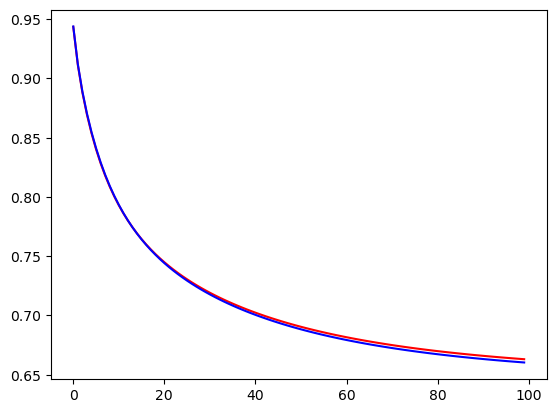

In [100]:
plt.plot(range(len(loss_tr_GD)), loss_tr_GD, c='red')
plt.plot(range(len(loss_te_GD)), loss_te_GD, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

In [101]:
accuracy = compute_accuracy(tx_te, y_te, w_GD, 0)
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 75.77199999999999%


In [102]:
x_test = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test, mean_x_test, std_x_test = standardize(x_test) # Standardize x

tx_test = build_poly(x_test, 2) # build polynomial expansion (with bias)

y_hat = build_prediction(tx_test, w_GD, 0.4)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv")

### Linear regression using stochastic gradient descent

In [71]:
w_SGD, epochs, step, gamma = np.zeros(61), 100, 100, 1e-4
for i in range((int)(epochs)):
    w_SGD, loss_tr = least_squares_SGD(y_tr, tx_tr, w_SGD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_SGD)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.32004029743145934 Test loss: 0.3188516426038994
Epoch 1 : Training loss: 0.3158255116133148 Test loss: 0.3145061929637362
Epoch 2 : Training loss: 0.3134461420413964 Test loss: 0.31201124451384593
Epoch 3 : Training loss: 0.31291591204369024 Test loss: 0.3114902770714836
Epoch 4 : Training loss: 0.30965924557360053 Test loss: 0.3078879255745183
Epoch 5 : Training loss: 0.30906381369523034 Test loss: 0.30713081705529705
Epoch 6 : Training loss: 0.30657664431750986 Test loss: 0.30443525155682827
Epoch 7 : Training loss: 0.3059970601881488 Test loss: 0.30358291356420225
Epoch 8 : Training loss: 0.30448641567911006 Test loss: 0.30188436070658636
Epoch 9 : Training loss: 0.3037338490311694 Test loss: 0.30076862812113064
Epoch 10 : Training loss: 0.3041445790838162 Test loss: 0.2996327489269914
Epoch 11 : Training loss: 0.3041545203041761 Test loss: 0.2995724920371117
Epoch 12 : Training loss: 0.304020388509992 Test loss: 0.2980766911529202
Epoch 13 : Training loss

#### Calculating the accuracy on the test set (with predictions = 0 or 1)

In [72]:
y_hat_cont = tx_te@w_SGD
y_hat = [1 if yi > 0.40 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 67.24799999999999%


### Least squares

In [54]:
w_LS, loss_tr = least_squares(y_tr, tx_tr)
loss_te = compute_mse(y_te, tx_te, w_LS)
print(f"Training loss: {loss_tr}\nTest loss: {loss_te}\nw: {w_LS}")

Training loss: 0.15775399909190493
Test loss: 1.0311299950200723
w: [ 3.37137664e-01  6.52970377e-02 -1.22701137e-01 -1.52811873e-01
  7.14286545e-02 -2.48003253e-02 -1.22351877e-02 -3.23113961e-02
  1.31578040e-01 -5.80539364e-03 -2.24032327e+02 -9.88973360e-02
  2.14275181e-02  3.53804357e-02  4.34080174e+01  5.00657117e-04
  3.13543582e-04  4.26889017e+01  6.03112117e-05  6.10099853e-04
  2.18336066e-03 -3.79707632e-04 -1.38501500e-02 -1.60504481e-02
  4.89221318e-02 -3.53733241e-04 -6.31491563e-04  1.74254852e-02
  7.00537917e-04 -7.62619593e-04  1.89889210e+02 -9.21111198e-03
  1.82965859e-02  7.96031102e-03  1.47479101e-03  1.00063298e-02
  2.30455444e-04 -3.84925914e-03 -2.91992065e-02  6.31294402e-04
 -5.83427643e-03  9.56267826e-03  2.67813328e-02  1.00913256e-02
 -6.23720001e-03 -1.66025009e-02 -1.53207500e-03 -9.60052673e-03
 -2.85748956e-02 -2.94577334e-05 -2.09764595e-03 -2.02235377e-04
 -1.09688513e-02 -2.03131101e-02 -5.79415916e-03  3.83367504e-02
 -1.11026240e-04 -3.90

### Ridge regression

In [43]:
lambda_ = 0.1
w_REG, loss_tr = ridge_regression(y_tr, tx_tr, lambda_)
print(f"Training loss: {loss}\n")

Training loss: 0.17758079539317778



### Logistic regression using gradient descent or SGD (y ∈ {0, 1})

### Regularized logistic regression using gradient descent or SGD (y ∈ {0, 1}, with regularization term λ∥w∥**2)